## Uber 
**Develop a predictive model to accurately forecast hourly traffic volumes at different road junctions based on historical traffic data**

In [64]:
import pandas as pd
import numpy as np

In [2]:
traffic = pd.read_csv("Dataset_Uber Traffic.csv")
weather = pd.read_csv("weather_data.csv")
events = pd.read_csv("events data.csv")

# Preview each dataset
print("Traffic Data:")
display(traffic.head())

print("\nWeather Data:")
display(weather.head())

print("\nEvents Data:")
display(events.head())

Traffic Data:


,DateTime,Junction,Vehicles,ID
0,01/11/15 0:00,1,15,20151101001
1,01/11/15 1:00,1,13,20151101011
2,01/11/15 2:00,1,10,20151101021
3,01/11/15 3:00,1,7,20151101031
4,01/11/15 4:00,1,9,20151101041



Weather Data:


,time,temperature,humidity,precipitation,wind_speed,Unnamed: 5
0,01/11/15 0:00,24.8,63,0.0,10.7,NaN
1,01/11/15 1:00,24.2,67,0.0,8.8,NaN
2,01/11/15 2:00,23.6,71,0.0,6.7,NaN
3,01/11/15 3:00,23.0,73,0.0,5.4,NaN
4,01/11/15 4:00,22.3,78,0.0,5.8,NaN



Events Data:


,date,event_type,event_name
0,02/10/2015,Public Holiday,Gandhi Jayanti
1,02/10/2016,Public Holiday,Gandhi Jayanti
2,02/10/2017,Public Holiday,Gandhi Jayanti
3,07/11/2015,Public Holiday,Diwali
4,10/01/2015,Sports Event,City Marathon


**Clean Data (Traffic first)**

Remove duplicates

In [3]:
traffic = traffic.drop_duplicates()

Handle missing values

In [4]:
traffic.isnull().sum()

DateTime    0
Junction    0
Vehicles    0
ID          0
dtype: int64

In [5]:
traffic = traffic.dropna(subset=["Junction"])
traffic["Vehicles"] = traffic["Vehicles"].fillna(0)

DateTime conversion

In [6]:
traffic["DateTime"] = pd.to_datetime(
    traffic["DateTime"],
    format="%d/%m/%y %H:%M",
    errors="coerce"
)

In [7]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   DateTime  48120 non-null  datetime64[ns]
 1   Junction  48120 non-null  int64         
 2   Vehicles  48120 non-null  int64         
 3   ID        48120 non-null  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 1.5 MB


**Aggregate Traffic Data (Hourly)**

hour column

In [8]:
traffic["hour"] = traffic["DateTime"].dt.floor("H")

Aggregate by junction + hour

In [9]:
traffic_hourly = (
    traffic
    .groupby(["Junction", "hour"], as_index=False)
    .agg({"Vehicles": "sum"})
)

In [10]:
traffic_hourly.head()

,Junction,hour,Vehicles
0,1,2015-11-01 00:00:00,15
1,1,2015-11-01 01:00:00,13
2,1,2015-11-01 02:00:00,10
3,1,2015-11-01 03:00:00,7
4,1,2015-11-01 04:00:00,9


**Weather Data Cleaning**

Remove duplicates (Weather)

In [11]:
weather = weather.drop_duplicates()

In [12]:
#missing values (Weather)
weather.isnull().sum()

time                 0
temperature          0
humidity             0
precipitation        0
wind_speed           0
Unnamed: 5       14592
dtype: int64

In [13]:
weather = weather.drop(columns=["Unnamed: 5"])

In [14]:
weather.isnull().sum()

time             0
temperature      0
humidity         0
precipitation    0
wind_speed       0
dtype: int64

In [15]:
weather.columns

Index(['time', 'temperature', 'humidity', 'precipitation', 'wind_speed'], dtype='object')

In [16]:
#Handle missing values
weather["temperature"] = weather["temperature"].fillna(
    weather["temperature"].median()
)

weather["humidity"] = weather["humidity"].fillna(
    weather["humidity"].median()
)

weather["wind_speed"] = weather["wind_speed"].fillna(
    weather["wind_speed"].median()
)

weather["precipitation"] = weather["precipitation"].fillna(0)

In [17]:
#time column to DateTime
weather["time"] = pd.to_datetime(
    weather["time"],
    errors="coerce"
)

C:\Users\banot\AppData\Local\Temp\ipykernel_10272\2310302525.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  weather["time"] = pd.to_datetime(


In [18]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14592 entries, 0 to 14591
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   time           14592 non-null  datetime64[ns]
 1   temperature    14592 non-null  float64       
 2   humidity       14592 non-null  int64         
 3   precipitation  14592 non-null  float64       
 4   wind_speed     14592 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 570.1 KB


**event dataset**

In [19]:
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        96 non-null     object
 1   event_type  96 non-null     object
 2   event_name  96 non-null     object
dtypes: object(3)
memory usage: 2.4+ KB


In [20]:
events.columns

Index(['date', 'event_type', 'event_name'], dtype='object')

In [21]:
events = events.drop_duplicates()

In [22]:
events.isnull().sum()

date          0
event_type    0
event_name    0
dtype: int64

In [23]:
events["date"] = pd.to_datetime(
 events["date"],
    errors="coerce"
)

In [24]:
events = events.dropna(subset=["date"])

In [25]:
events["event_flag"] = 1

In [26]:
events = events[["date", "event_flag"]]

In [27]:
events.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40 entries, 0 to 39
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        40 non-null     datetime64[ns]
 1   event_flag  40 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 960.0 bytes


In [28]:
#Inspect traffic hourly data,Inspect weather data
traffic_hourly.head()

,Junction,hour,Vehicles
0,1,2015-11-01 00:00:00,15
1,1,2015-11-01 01:00:00,13
2,1,2015-11-01 02:00:00,10
3,1,2015-11-01 03:00:00,7
4,1,2015-11-01 04:00:00,9


In [29]:
weather.head()

,time,temperature,humidity,precipitation,wind_speed
0,2015-01-11 00:00:00,24.8,63,0.0,10.7
1,2015-01-11 01:00:00,24.2,67,0.0,8.8
2,2015-01-11 02:00:00,23.6,71,0.0,6.7
3,2015-01-11 03:00:00,23.0,73,0.0,5.4
4,2015-01-11 04:00:00,22.3,78,0.0,5.8


In [30]:
#weather to HOURLY level
weather["hour"] = weather["time"].dt.floor("H")

**Aggregate weather by hour**

In [31]:
weather_hourly = (
    weather
    .groupby("hour", as_index=False)
    .agg({
        "temperature": "mean",
        "humidity": "mean",
        "precipitation": "sum",
        "wind_speed": "mean"
    })
)

In [32]:
#Merge traffic + weather
traffic_weather = pd.merge(
    traffic_hourly,
    weather_hourly,
    on="hour",
    how="left"
)

In [33]:
traffic_weather.head()

,Junction,hour,Vehicles,temperature,humidity,precipitation,wind_speed
0,1,2015-11-01 00:00:00,15,NaN,NaN,NaN,NaN
1,1,2015-11-01 01:00:00,13,NaN,NaN,NaN,NaN
2,1,2015-11-01 02:00:00,10,NaN,NaN,NaN,NaN
3,1,2015-11-01 03:00:00,7,NaN,NaN,NaN,NaN
4,1,2015-11-01 04:00:00,9,NaN,NaN,NaN,NaN


Prepare events for merge

In [34]:
events["date"] = events["date"].dt.date
traffic_weather["date"] = traffic_weather["hour"].dt.date

In [35]:
#Merge events with traffic + weather
traffic_weather_events = pd.merge(
    traffic_weather,
    events[["date", "event_flag"]],
    on="date",
    how="left"
)

In [36]:
#Handle non-event hours
#No event → event_flag = 0
traffic_weather_events["event_flag"] = (
    traffic_weather_events["event_flag"].fillna(0)
)

In [37]:
traffic_weather_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Junction       48120 non-null  int64         
 1   hour           48120 non-null  datetime64[ns]
 2   Vehicles       48120 non-null  int64         
 3   temperature    43224 non-null  float64       
 4   humidity       43224 non-null  float64       
 5   precipitation  43224 non-null  float64       
 6   wind_speed     43224 non-null  float64       
 7   date           48120 non-null  object        
 8   event_flag     48120 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(2), object(1)
memory usage: 3.3+ MB


**EDA (Exploratory Data Analysis)**

In [38]:
#Basic sanity check
traffic_weather_events.head()

,Junction,hour,Vehicles,temperature,humidity,precipitation,wind_speed,date,event_flag
0,1,2015-11-01 00:00:00,15,NaN,NaN,NaN,NaN,2015-11-01,0.0
1,1,2015-11-01 01:00:00,13,NaN,NaN,NaN,NaN,2015-11-01,0.0
2,1,2015-11-01 02:00:00,10,NaN,NaN,NaN,NaN,2015-11-01,0.0
3,1,2015-11-01 03:00:00,7,NaN,NaN,NaN,NaN,2015-11-01,0.0
4,1,2015-11-01 04:00:00,9,NaN,NaN,NaN,NaN,2015-11-01,0.0


In [39]:
#Dataset structure & data types
traffic_weather_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Junction       48120 non-null  int64         
 1   hour           48120 non-null  datetime64[ns]
 2   Vehicles       48120 non-null  int64         
 3   temperature    43224 non-null  float64       
 4   humidity       43224 non-null  float64       
 5   precipitation  43224 non-null  float64       
 6   wind_speed     43224 non-null  float64       
 7   date           48120 non-null  object        
 8   event_flag     48120 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(2), object(1)
memory usage: 3.3+ MB


In [40]:
traffic_weather_events.describe()

,Junction,hour,Vehicles,temperature,humidity,precipitation,wind_speed,event_flag
count,48120.000000,48120,48120.000000,43224.000000,43224.000000,43224.000000,43224.00000,48120.000000
mean,2.180549,2016-09-19 06:03:56.109725696,22.791334,26.550634,56.003979,0.083356,10.90195,0.021446
min,1.000000,2015-11-01 00:00:00,1.000000,12.400000,9.000000,0.000000,0.00000,0.000000
25%,1.000000,2016-04-16 01:45:00,9.000000,22.900000,36.000000,0.000000,7.40000,0.000000
50%,2.000000,2016-09-30 03:30:00,15.000000,26.100000,56.000000,0.000000,9.60000,0.000000
75%,3.000000,2017-02-25 16:00:00,29.000000,29.700000,76.000000,0.000000,13.50000,0.000000
max,4.000000,2017-06-30 23:00:00,180.000000,41.400000,99.000000,9.400000,37.10000,1.000000
std,0.966955,NaN,20.750063,5.393272,23.059020,0.403955,5.15508,0.144868


<Axes: >

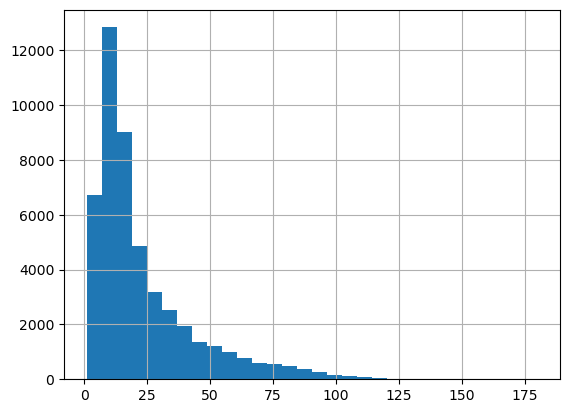

In [41]:
#Distribution of traffic volume
traffic_weather_events["Vehicles"].hist(bins=30)

<Axes: xlabel='hour'>

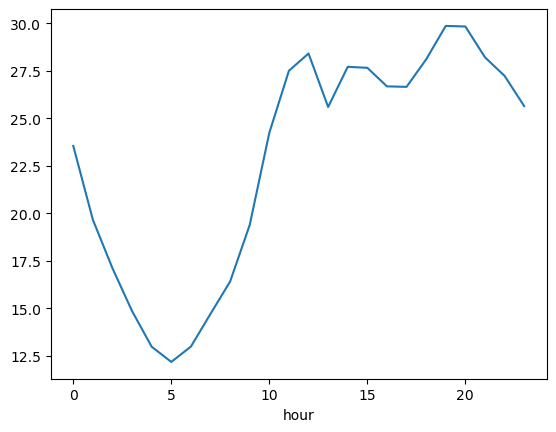

In [42]:
#Average traffic by hour (peak-hour analysis)
traffic_weather_events.groupby(
    traffic_weather_events["hour"].dt.hour
)["Vehicles"].mean().plot(kind="line")

In [43]:
#Event vs Non-Event traffic analysis
traffic_weather_events.groupby("event_flag")["Vehicles"].mean()

event_flag
0.0    22.750786
1.0    24.641473
Name: Vehicles, dtype: float64

In [44]:
#Correlation between traffic and weather variables
traffic_weather_events[
    ["Vehicles", "temperature", "humidity", "precipitation", "wind_speed"]
].corr()

,Vehicles,temperature,humidity,precipitation,wind_speed
Vehicles,1.000000,0.164655,-0.119817,0.017025,0.007025
temperature,0.164655,1.000000,-0.703659,-0.073300,0.029373
humidity,-0.119817,-0.703659,1.000000,0.268623,0.253264
precipitation,0.017025,-0.073300,0.268623,1.000000,0.156209
wind_speed,0.007025,0.029373,0.253264,0.156209,1.000000


The exploratory data analysis was performed on the merged dataset combining traffic, weather, and event information to understand underlying patterns and relationships before feature engineering.

Traffic Patterns:

--Traffic volume shows clear variation across hours, indicating strong time dependency.

--Distinct peak and off-peak hours are observed, justifying the need for hour-based features.

Event Impact:

--Average traffic differs between event and non-event periods, confirming that events influence traffic flow.

--This validates the inclusion of an event indicator as an important feature.

Weather Influence:

--Weather variables such as temperature, humidity, precipitation, and wind speed show varying degrees of correlation with traffic volume.

--While correlations are not extremely high, they suggest that weather conditions contribute to traffic variability and should be retained for modeling.

Data Quality Observations:

--Weather data is missing for some traffic hours, which is expected due to data availability differences.

--The dataset structure is consistent, with a clean target variable (Vehicles) and properly formatted time information.

# Feature Engineering

In [47]:
#Create basic time-based features
traffic_weather_events["hour_of_day"] = traffic_weather_events["hour"].dt.hour
traffic_weather_events["day_of_week"] = traffic_weather_events["hour"].dt.dayofweek
traffic_weather_events["month"] = traffic_weather_events["hour"].dt.month

In [48]:
#Create weekend indicator
traffic_weather_events["is_weekend"] = (
    traffic_weather_events["day_of_week"] >= 5
).astype(int)

In [49]:
#Sort data before creating lag features
traffic_weather_events = traffic_weather_events.sort_values(
    by=["Junction", "hour"]
)

In [50]:
#Create lag feature (previous hour traffic)
traffic_weather_events["lag_1_hour"] = (
    traffic_weather_events
    .groupby("Junction")["Vehicles"]
    .shift(1)
)

In [51]:
#Handle missing values from lag features
traffic_weather_events["lag_1_hour"] = (
    traffic_weather_events["lag_1_hour"]
    .fillna(method="bfill")
)

In [52]:
#rolling average feature (traffic smoothing)
traffic_weather_events["rolling_3_hour_avg"] = (
    traffic_weather_events
    .groupby("Junction")["Vehicles"]
    .transform(lambda x: x.rolling(window=3, min_periods=1).mean())
)

In [53]:
#Final feature cleanup (drop redundant columns)
traffic_weather_events = traffic_weather_events.drop(
    columns=["date"]
)

**Preprocess the Data (Normalization / Standardization)**

In [54]:
#Select numeric features to scale
scale_features = [
    "temperature",
    "humidity",
    "precipitation",
    "wind_speed",
    "lag_1_hour",
    "rolling_3_hour_avg"
]

In [55]:
#Apply Standardization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
traffic_weather_events[scale_features] = scaler.fit_transform(
    traffic_weather_events[scale_features]
)

In [56]:
#Verify scaling
traffic_weather_events[scale_features].describe()

,temperature,humidity,precipitation,wind_speed,lag_1_hour,rolling_3_hour_avg
count,4.322400e+04,4.322400e+04,4.322400e+04,4.322400e+04,4.812000e+04,4.812000e+04
mean,-3.051007e-16,-2.104143e-17,5.917902e-17,-9.994678e-17,2.835083e-17,-1.228536e-16
std,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000010e+00,1.000010e+00
min,-2.623787e+00,-2.038444e+00,-2.063534e-01,-2.114822e+00,-1.050133e+00,-1.064732e+00
25%,-6.768945e-01,-8.675221e-01,-2.063534e-01,-6.793281e-01,-6.645648e-01,-6.738025e-01
50%,-8.355579e-02,-1.725709e-04,-2.063534e-01,-2.525597e-01,-3.753884e-01,-3.643166e-01
75%,5.839502e-01,8.671770e-01,-2.063534e-01,5.039843e-01,2.993564e-01,3.198103e-01
max,2.753345e+00,1.864629e+00,2.306385e+01,5.082046e+00,7.576961e+00,6.428086e+00


**Evaluate feature**

In [57]:
#target and features
target = "Vehicles"

feature_cols = [
    "hour_of_day",
    "day_of_week",
    "month",
    "is_weekend",
    "event_flag",
    "temperature",
    "humidity",
    "precipitation",
    "wind_speed",
    "lag_1_hour",
    "rolling_3_hour_avg"
]

X = traffic_weather_events[feature_cols]
y = traffic_weather_events[target]

Correlation analysis (statistical method)

In [58]:
correlation_with_target = X.copy()
correlation_with_target["Vehicles"] = y

correlation_with_target.corr()["Vehicles"].sort_values(ascending=False)

Vehicles              1.000000
rolling_3_hour_avg    0.982571
lag_1_hour            0.970144
hour_of_day           0.219938
temperature           0.164655
precipitation         0.017025
event_flag            0.013200
wind_speed            0.007025
month                -0.022723
humidity             -0.119817
day_of_week          -0.126027
is_weekend           -0.150550
Name: Vehicles, dtype: float64

Tree-based feature importance (ML method)

In [60]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
X_imputed = imputer.fit_transform(X)

X_imputed = pd.DataFrame(X_imputed, columns=feature_cols)

In [62]:
#Tree-based feature
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_imputed, y)

feature_importance = pd.Series(
    rf.feature_importances_,
    index=feature_cols
).sort_values(ascending=False)

feature_importance

rolling_3_hour_avg    0.967778
hour_of_day           0.015882
lag_1_hour            0.007123
wind_speed            0.001991
temperature           0.001896
humidity              0.001685
month                 0.001593
day_of_week           0.001324
is_weekend            0.000446
precipitation         0.000209
event_flag            0.000072
dtype: float64

Select final influential features

In [63]:
selected_features = feature_importance[
    feature_importance > 0.03
].index.tolist()

selected_features

['rolling_3_hour_avg']

# Peak Hour Identification & Pattern Analysis

**Calculate Congestion Metrics**

In [65]:
#Compute congestion metrics for each hour (0–23)
# Create hour of day (if not already created)
traffic_weather_events["hour_of_day"] = traffic_weather_events["hour"].dt.hour

# Hourly congestion metrics across all days
hourly_congestion = (
    traffic_weather_events
    .groupby("hour_of_day")["Vehicles"]
    .agg(
        avg_vehicles="mean",
        max_vehicles="max",
        variability="std"
    )
    .reset_index()
)

hourly_congestion

,hour_of_day,avg_vehicles,max_vehicles,variability
0,0,23.540648,109,19.148046
1,1,19.654863,81,16.310962
2,2,17.102743,69,14.159042
3,3,14.847382,57,12.333346
4,4,12.973067,48,10.668348
5,5,12.173566,47,9.982610
6,6,12.980050,53,11.037344
7,7,14.703242,59,12.482891
8,8,16.402993,67,13.767212
9,9,19.379551,78,16.201207


Identify Peak Hours

In [66]:
#Analyze hourly congestion levels
# Sort hours by average congestion
hourly_congestion.sort_values(
    by="avg_vehicles",
    ascending=False
)

,hour_of_day,avg_vehicles,max_vehicles,variability
19,19,29.854863,180,25.532148
20,20,29.824938,173,25.446723
12,12,28.403990,129,24.568723
21,21,28.202993,125,23.654558
18,18,28.095262,141,24.159760
14,14,27.702743,162,23.902777
15,15,27.650374,134,23.402236
11,11,27.495262,136,24.142347
22,22,27.226933,111,22.178798
16,16,26.674314,134,22.204169


In [67]:
#Statistical confirmation of peak hours
#Moving average
hourly_congestion["moving_avg"] = (
    hourly_congestion["avg_vehicles"]
    .rolling(window=3, center=True)
    .mean()
)

hourly_congestion

,hour_of_day,avg_vehicles,max_vehicles,variability,moving_avg
0,0,23.540648,109,19.148046,NaN
1,1,19.654863,81,16.310962,20.099418
2,2,17.102743,69,14.159042,17.201663
3,3,14.847382,57,12.333346,14.974397
4,4,12.973067,48,10.668348,13.331338
5,5,12.173566,47,9.982610,12.708894
6,6,12.980050,53,11.037344,13.285619
7,7,14.703242,59,12.482891,14.695428
8,8,16.402993,67,13.767212,16.828595
9,9,19.379551,78,16.201207,20.004156


In [68]:
#Variability check (consistency of congestion)
hourly_congestion.sort_values(
    by="variability",
    ascending=False
)

,hour_of_day,avg_vehicles,max_vehicles,variability,moving_avg
19,19,29.854863,180,25.532148,29.258354
20,20,29.824938,173,25.446723,29.294264
12,12,28.403990,129,24.568723,27.162594
18,18,28.095262,141,24.159760,28.199501
11,11,27.495262,136,24.142347,26.709726
14,14,27.702743,162,23.902777,26.980549
21,21,28.202993,125,23.654558,28.418288
15,15,27.650374,134,23.402236,27.342477
16,16,26.674314,134,22.204169,26.991022
22,22,27.226933,111,22.178798,27.021779


Examine Temporal Patterns

In [69]:
#Day-of-week analysis
# Create day of week
traffic_weather_events["day_of_week"] = traffic_weather_events["hour"].dt.dayofweek

# Average traffic by hour and day
dow_hourly = (
    traffic_weather_events
    .groupby(["day_of_week", "hour_of_day"])["Vehicles"]
    .mean()
    .reset_index()
)

dow_hourly

,day_of_week,hour_of_day,Vehicles
0,0,0,20.219512
1,0,1,16.480836
2,0,2,14.456446
3,0,3,13.163763
4,0,4,12.149826
...,...,...,...
163,6,19,22.756098
164,6,20,23.860627
165,6,21,22.951220
166,6,22,22.888502


In [70]:
#Weekday vs Weekend comparison
traffic_weather_events["is_weekend"] = (
    traffic_weather_events["day_of_week"] >= 5
).astype(int)

traffic_weather_events.groupby("is_weekend")["Vehicles"].mean()

is_weekend
0    24.760163
1    17.834722
Name: Vehicles, dtype: float64

In [71]:
#Monthly / seasonal patterns
# Extract month
traffic_weather_events["month"] = traffic_weather_events["hour"].dt.month

monthly_congestion = (
    traffic_weather_events
    .groupby("month")["Vehicles"]
    .mean()
    .reset_index()
)

monthly_congestion

,month,Vehicles
0,1,19.727343
1,2,22.962312
2,3,23.073349
3,4,24.454365
4,5,24.633449
5,6,26.032143
6,7,21.837814
7,8,21.936380
8,9,25.644907
9,10,26.551075


Analyze Influencing Factors

In [72]:
#Weather impact on congestion
weather_impact = traffic_weather_events[
    ["Vehicles", "temperature", "humidity", "precipitation", "wind_speed"]
].corr()

weather_impact

,Vehicles,temperature,humidity,precipitation,wind_speed
Vehicles,1.000000,0.164655,-0.119817,0.017025,0.007025
temperature,0.164655,1.000000,-0.703659,-0.073300,0.029373
humidity,-0.119817,-0.703659,1.000000,0.268623,0.253264
precipitation,0.017025,-0.073300,0.268623,1.000000,0.156209
wind_speed,0.007025,0.029373,0.253264,0.156209,1.000000


In [73]:
#Event impact on congestion
# Event vs non-event traffic comparison
traffic_weather_events.groupby("event_flag")["Vehicles"].mean()

event_flag
0.0    22.750786
1.0    24.641473
Name: Vehicles, dtype: float64

In [74]:
#Event impact during peak hours
# Identify top 3 peak hours
peak_hours = (
    hourly_congestion
    .sort_values(by="avg_vehicles", ascending=False)
    .head(3)["hour_of_day"]
    .tolist()
)

# Event vs non-event traffic during peak hours
traffic_weather_events[
    traffic_weather_events["hour_of_day"].isin(peak_hours)
].groupby("event_flag")["Vehicles"].mean()

event_flag
0.0    29.314645
1.0    31.488372
Name: Vehicles, dtype: float64

In [75]:
#Quantify influence (correlation-based reasoning)
# Correlation of all influencing factors with congestion
influence_analysis = traffic_weather_events[
    [
        "Vehicles",
        "temperature",
        "humidity",
        "precipitation",
        "wind_speed",
        "event_flag",
        "is_weekend"
    ]
].corr()

influence_analysis["Vehicles"].sort_values(ascending=False)

Vehicles         1.000000
temperature      0.164655
precipitation    0.017025
event_flag       0.013200
wind_speed       0.007025
humidity        -0.119817
is_weekend      -0.150550
Name: Vehicles, dtype: float64

# Visualisation

Visualize Peak Hours & Variations

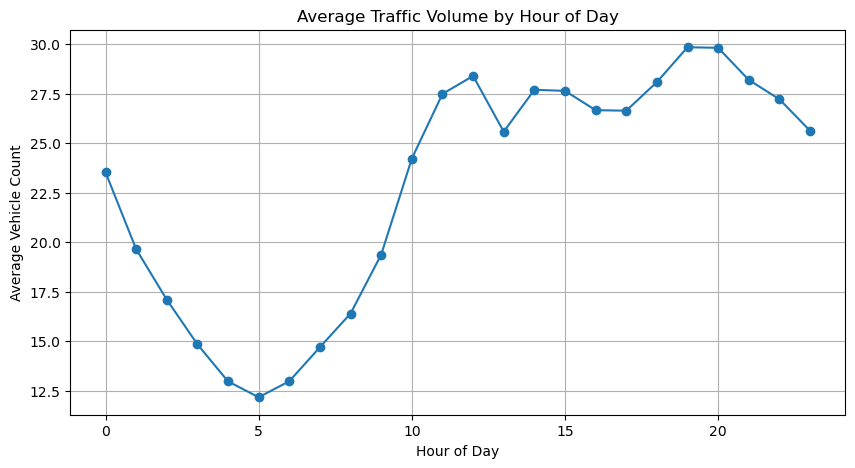

In [76]:
#Line Chart — Average Traffic vs Hour (Peak Hour Identification)
import matplotlib.pyplot as plt

hourly_avg = (
    traffic_weather_events
    .groupby("hour_of_day")["Vehicles"]
    .mean()
)

plt.figure(figsize=(10,5))
plt.plot(hourly_avg.index, hourly_avg.values, marker="o")
plt.xlabel("Hour of Day")
plt.ylabel("Average Vehicle Count")
plt.title("Average Traffic Volume by Hour of Day")
plt.grid(True)
plt.show()

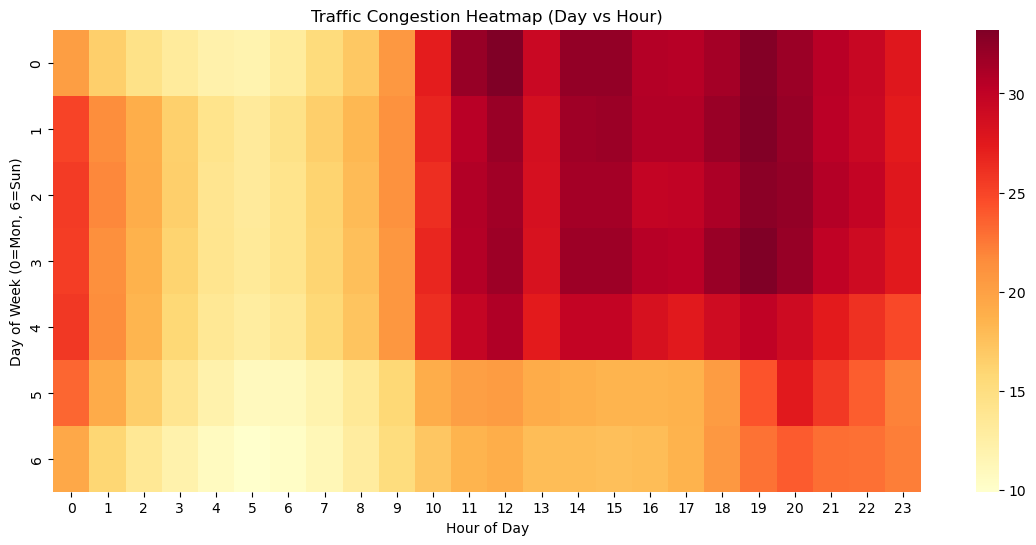

In [77]:
#Heatmap — Hour × Day Congestion Pattern
import seaborn as sns

heatmap_data = (
    traffic_weather_events
    .groupby(["day_of_week", "hour_of_day"])["Vehicles"]
    .mean()
    .unstack()
)

plt.figure(figsize=(14,6))
sns.heatmap(heatmap_data, cmap="YlOrRd")
plt.xlabel("Hour of Day")
plt.ylabel("Day of Week (0=Mon, 6=Sun)")
plt.title("Traffic Congestion Heatmap (Day vs Hour)")
plt.show()

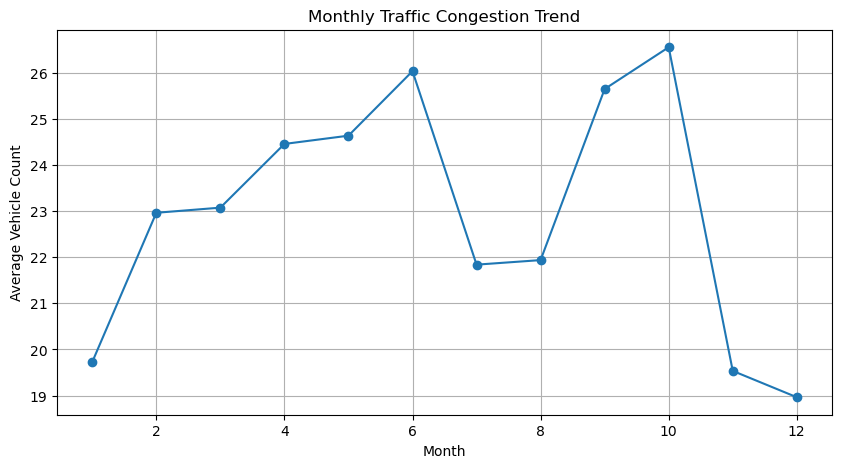

In [78]:
#Monthly Trend Plot — Seasonal Congestion
monthly_avg = (
    traffic_weather_events
    .groupby("month")["Vehicles"]
    .mean()
)

plt.figure(figsize=(10,5))
plt.plot(monthly_avg.index, monthly_avg.values, marker="o")
plt.xlabel("Month")
plt.ylabel("Average Vehicle Count")
plt.title("Monthly Traffic Congestion Trend")
plt.grid(True)
plt.show()

Visualize Impact of External Factors

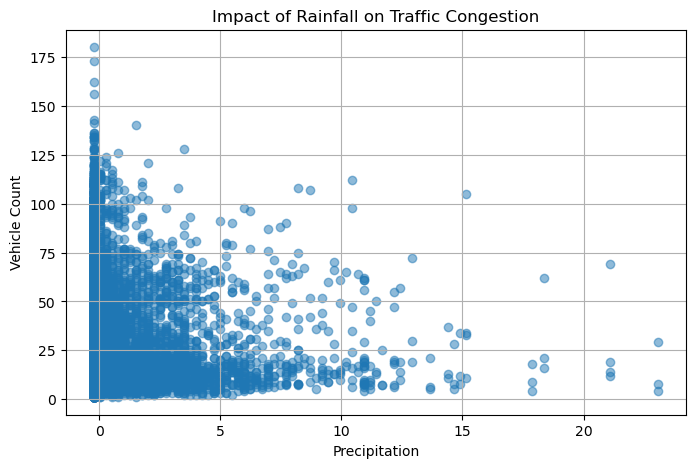

In [79]:
#Scatter Plot — Rainfall vs Traffic
plt.figure(figsize=(8,5))
plt.scatter(
    traffic_weather_events["precipitation"],
    traffic_weather_events["Vehicles"],
    alpha=0.5
)
plt.xlabel("Precipitation")
plt.ylabel("Vehicle Count")
plt.title("Impact of Rainfall on Traffic Congestion")
plt.grid(True)
plt.show()

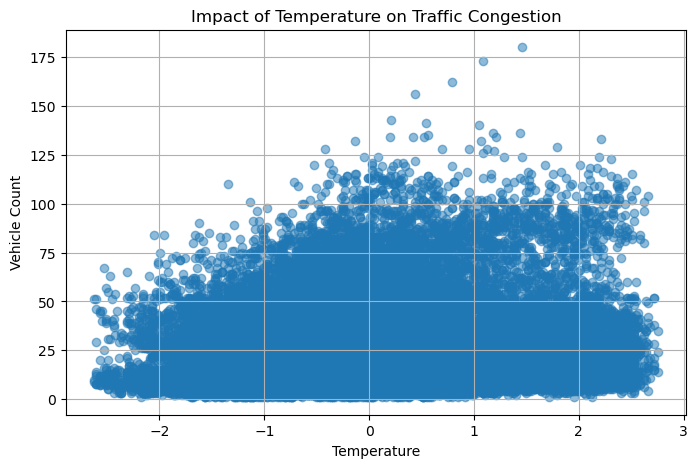

In [80]:
#Scatter Plot — Temperature vs Traffic
plt.figure(figsize=(8,5))
plt.scatter(
    traffic_weather_events["temperature"],
    traffic_weather_events["Vehicles"],
    alpha=0.5
)
plt.xlabel("Temperature")
plt.ylabel("Vehicle Count")
plt.title("Impact of Temperature on Traffic Congestion")
plt.grid(True)
plt.show()

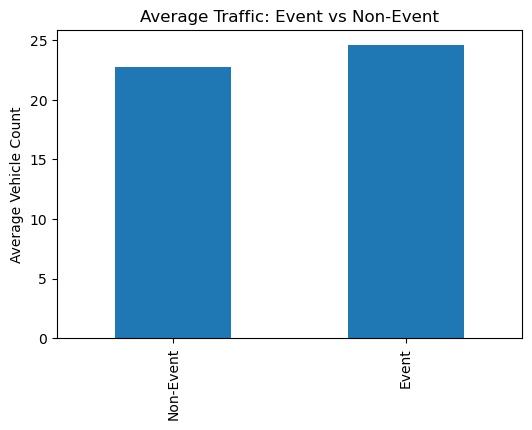

In [81]:
#Bar Chart — Event vs Non-Event Congestion
event_comparison = (
    traffic_weather_events
    .groupby("event_flag")["Vehicles"]
    .mean()
)

event_comparison.index = ["Non-Event", "Event"]

event_comparison.plot(
    kind="bar",
    figsize=(6,4),
    title="Average Traffic: Event vs Non-Event"
)

plt.ylabel("Average Vehicle Count")
plt.show()

REPORTS

In [82]:
#Junction-Wise Summary Report
junction_summary = (
    traffic_weather_events
    .groupby(["Junction", "hour_of_day"])["Vehicles"]
    .mean()
    .reset_index()
)

# Identify peak hour per junction
peak_per_junction = (
    junction_summary
    .loc[
        junction_summary.groupby("Junction")["Vehicles"].idxmax()
    ]
    .rename(columns={"hour_of_day": "Peak_Hour", "Vehicles": "Avg_Vehicles"})
)

peak_per_junction

,Junction,Peak_Hour,Avg_Vehicles
19,1,19,58.804276
44,2,20,18.060855
68,3,20,20.200658
84,4,12,10.237569


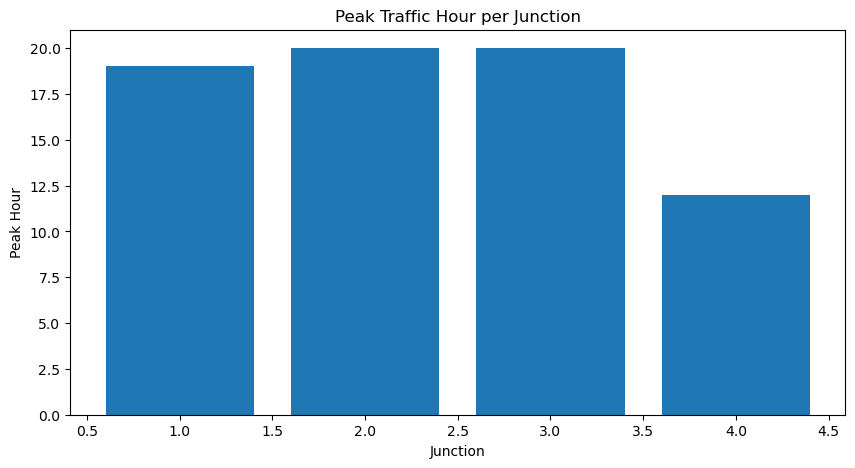

In [83]:
#Plot Peak Hour per Junction
plt.figure(figsize=(10,5))
plt.bar(
    peak_per_junction["Junction"],
    peak_per_junction["Peak_Hour"]
)
plt.xlabel("Junction")
plt.ylabel("Peak Hour")
plt.title("Peak Traffic Hour per Junction")
plt.show()

In [84]:
#Actionable Insights (Code-Backed Evidence)
peak_hours = hourly_avg.sort_values(ascending=False).head(3)
peak_hours

hour_of_day
19    29.854863
20    29.824938
12    28.403990
Name: Vehicles, dtype: float64

In [85]:
#Event-Based Traffic Management
traffic_weather_events.groupby(
    ["event_flag", "hour_of_day"]
)["Vehicles"].mean().head(10)

event_flag  hour_of_day
0.0         0              23.455657
            1              19.571356
            2              17.044852
            3              14.801733
            4              12.939348
            5              12.140163
            6              12.941896
            7              14.666667
            8              16.361876
            9              19.345566
Name: Vehicles, dtype: float64

In [86]:
#Weather-Aware Congestion Planning
traffic_weather_events[
    ["Vehicles", "precipitation", "temperature", "humidity"]
].corr()["Vehicles"]

Vehicles         1.000000
precipitation    0.017025
temperature      0.164655
humidity        -0.119817
Name: Vehicles, dtype: float64

## Model Development & Training

#Model
1. ARIMA → captures temporal dependence
2. LSTM → captures long-term sequential patterns
3. Gradient Boosting → handles non-linearity + mixed features

TIME-BASED TRAIN–VALIDATION SPLIT

In [109]:
traffic_weather_events = traffic_weather_events.sort_values("hour")

#Define features and target
target = "Vehicles"

feature_cols = [
    "hour_of_day", "day_of_week", "month",
    "is_weekend", "event_flag",
    "temperature", "humidity", "precipitation", "wind_speed",
    "lag_1_hour", "rolling_3_hour_avg"
]

X = traffic_weather_events[feature_cols]
y = traffic_weather_events[target]


In [88]:
#Time-based split (80% train, 20% validation)
split_index = int(len(traffic_weather_events) * 0.8)

X_train, X_val = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_val = y.iloc[:split_index], y.iloc[split_index:]

In [107]:
split_index

38496

MODEL 1: ARIMA (Time-Series Model)

In [89]:
#Prepare univariate time series
y_train_ts = y_train
y_val_ts = y_val

In [90]:
#Train ARIMA
from statsmodels.tsa.arima.model import ARIMA

arima_model = ARIMA(y_train_ts, order=(3, 1, 2))
arima_fitted = arima_model.fit()

D:\Anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [91]:
#Forecast
arima_predictions = arima_fitted.forecast(steps=len(y_val_ts))

D:\Anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
D:\Anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [110]:
arima_predictions.head()

38496    57.293207
38497    44.786574
38498    39.441630
38499    40.415361
38500    40.134779
Name: predicted_mean, dtype: float64

MODEL 2: GRADIENT BOOSTING REGRESSOR (Tree-Based)

In [93]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

X_train_imputed = imputer.fit_transform(X_train)
X_val_imputed   = imputer.transform(X_val)

# Convert back to DataFrame
X_train_imputed = pd.DataFrame(X_train_imputed, columns=X_train.columns)
X_val_imputed   = pd.DataFrame(X_val_imputed, columns=X_val.columns)

In [94]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

gbr = GradientBoostingRegressor(random_state=42)

param_grid = {
    "n_estimators": [100, 200],
    "learning_rate": [0.05, 0.1],
    "max_depth": [3, 5]
}
#Hyperparameter tuning
grid_search = GridSearchCV(
    estimator=gbr,
    param_grid=param_grid,
    cv=3,
    scoring="neg_mean_absolute_error",
    n_jobs=-1
)

grid_search.fit(X_train_imputed, y_train)

GridSearchCV(cv=3, estimator=GradientBoostingRegressor(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1], 'max_depth': [3, 5],
                         'n_estimators': [100, 200]},
             scoring='neg_mean_absolute_error')

In [95]:
#Best model
best_gbr = grid_search.best_estimator_
best_gbr

GradientBoostingRegressor(learning_rate=0.05, max_depth=5, n_estimators=200,
                          random_state=42)

In [99]:
#Train final model
best_gbr.fit(X_train_imputed, y_train)

GradientBoostingRegressor(learning_rate=0.05, max_depth=5, n_estimators=200,
                          random_state=42)

In [101]:
#Predict
gbr_predictions = best_gbr.predict(X_val_imputed)
gbr_predictions

array([ 7.54485585, 88.24287765, 33.36649918, ..., 30.06519018,
       28.03409538, 14.70163879])

## MODEL EVALUATION & CROSS VALIDATION

**Select Evaluation Metrics**

MAE, RMSE, R² — explicitly required

In [111]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

Evaluate Model Performance

In [112]:
# ARIMA evaluation
arima_mae = mean_absolute_error(y_val, arima_predictions)
arima_rmse = np.sqrt(mean_squared_error(y_val, arima_predictions))
arima_r2 = r2_score(y_val, arima_predictions)

arima_mae, arima_rmse, arima_r2

(25.14089633710592, 29.040886190904057, -0.1378677245603439)

In [113]:
#Compute metrics for Gradient Boosting
# Gradient Boosting evaluation
gbr_mae = mean_absolute_error(y_val, gbr_predictions)
gbr_rmse = np.sqrt(mean_squared_error(y_val, gbr_predictions))
gbr_r2 = r2_score(y_val, gbr_predictions)

gbr_mae, gbr_rmse, gbr_r2

(2.0487015796251935, 3.4893802032522756, 0.9835726074647063)

In [114]:
#Compare models
evaluation_results = pd.DataFrame({
    "Model": ["ARIMA", "Gradient Boosting"],
    "MAE": [arima_mae, gbr_mae],
    "RMSE": [arima_rmse, gbr_rmse],
    "R2": [arima_r2, gbr_r2]
})

evaluation_results

,Model,MAE,RMSE,R2
0,ARIMA,25.140896,29.040886,-0.137868
1,Gradient Boosting,2.048702,3.489380,0.983573


Lower MAE & RMSE → better

Higher R² → better

**Visual Evaluation**

Actual vs Predicted Plot (Gradient Boosting)

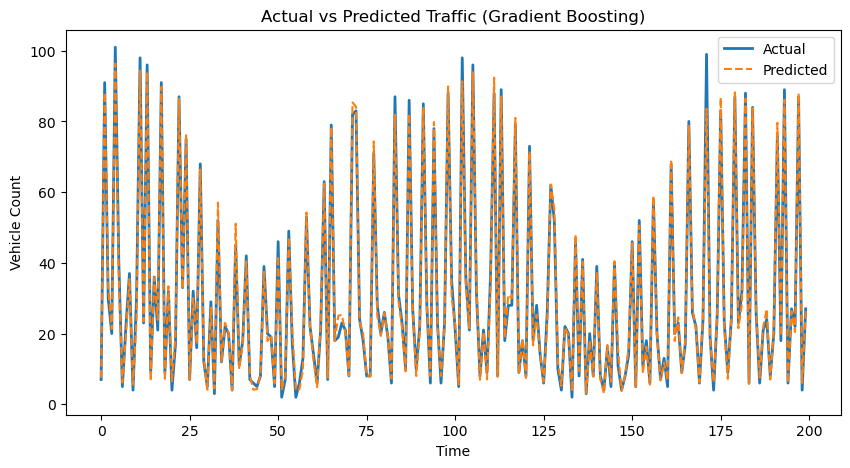

In [115]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(y_val.values[:200], label="Actual", linewidth=2)
plt.plot(gbr_predictions[:200], label="Predicted", linestyle="--")
plt.title("Actual vs Predicted Traffic (Gradient Boosting)")
plt.xlabel("Time")
plt.ylabel("Vehicle Count")
plt.legend()
plt.show()

Residual Plot (Gradient Boosting)

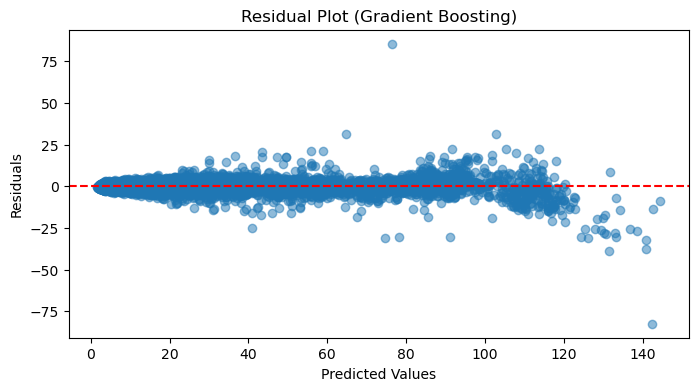

In [116]:
residuals = y_val.values - gbr_predictions

plt.figure(figsize=(8,4))
plt.scatter(gbr_predictions, residuals, alpha=0.5)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot (Gradient Boosting)")
plt.show()

Random scatter → good fit

Patterns → model bias

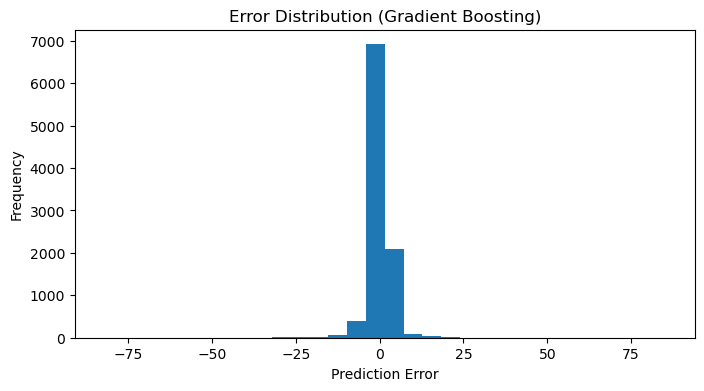

In [117]:
#Error Distribution
plt.figure(figsize=(8,4))
plt.hist(residuals, bins=30)
plt.title("Error Distribution (Gradient Boosting)")
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.show()

**Implement Cross-Validation (TIME-BASED)**

Time-based Cross Validation

In [118]:
from sklearn.model_selection import TimeSeriesSplit

tscv = TimeSeriesSplit(n_splits=5)

mae_scores = []
rmse_scores = []
r2_scores = []

for train_idx, val_idx in tscv.split(X_train_imputed):
    X_tr, X_va = X_train_imputed.iloc[train_idx], X_train_imputed.iloc[val_idx]
    y_tr, y_va = y_train.iloc[train_idx], y_train.iloc[val_idx]
    
    model = GradientBoostingRegressor(
        learning_rate=0.05,
        max_depth=5,
        n_estimators=200,
        random_state=42
    )
    
    model.fit(X_tr, y_tr)
    preds = model.predict(X_va)
    
    mae_scores.append(mean_absolute_error(y_va, preds))
    rmse_scores.append(np.sqrt(mean_squared_error(y_va, preds)))
    r2_scores.append(r2_score(y_va, preds))

In [119]:
#Cross-validation results
cv_results = pd.DataFrame({
    "Fold": range(1, len(mae_scores) + 1),
    "MAE": mae_scores,
    "RMSE": rmse_scores,
    "R2": r2_scores
})

cv_results

,Fold,MAE,RMSE,R2
0,1,1.822719,2.941099,0.938181
1,2,1.870320,3.672600,0.942119
2,3,2.012140,3.476143,0.966486
3,4,1.882545,3.111107,0.979626
4,5,1.900435,3.383749,0.980632


**Analyze Cross-Validation Results**

In [120]:
#Check stability across folds
cv_results.describe()

,Fold,MAE,RMSE,R2
count,5.000000,5.000000,5.000000,5.000000
mean,3.000000,1.897632,3.316940,0.961409
std,1.581139,0.070188,0.291516,0.020241
min,1.000000,1.822719,2.941099,0.938181
25%,2.000000,1.870320,3.111107,0.942119
50%,3.000000,1.882545,3.383749,0.966486
75%,4.000000,1.900435,3.476143,0.979626
max,5.000000,2.012140,3.672600,0.980632


Low variance → stable model

Large swings → overfitting risk

In [121]:
#Final Cross-validation summary
print("Average MAE:", np.mean(mae_scores))
print("Average RMSE:", np.mean(rmse_scores))
print("Average R2:", np.mean(r2_scores))

Average MAE: 1.8976318873622233
Average RMSE: 3.3169395609339487
Average R2: 0.9614088705643684


## MODEL REFINEMENT

**Diagnose Model Issues**

diagnose bias, variance, and error patterns using evaluation outputs

In [124]:
#hour_of_day into val_results
val_results = X_val_imputed.copy()

# Add hour_of_day explicitly
val_results["hour_of_day"] = X_val["hour_of_day"].values

val_results["Actual"] = y_val.values
val_results["Predicted"] = gbr_predictions
val_results["Residual"] = val_results["Actual"] - val_results["Predicted"]

In [126]:
#peak hours using val_results itself
peak_hours = [8, 9, 17, 18]

peak_errors = val_results[
    val_results["hour_of_day"].isin(peak_hours)
]["Residual"]

peak_errors.describe()

count    1604.000000
mean        0.100435
std         3.128055
min       -31.981662
25%        -1.220368
50%         0.146697
75%         1.327574
max        31.203978
Name: Residual, dtype: float64

In [129]:
#Peak Hour Bias Diagnosis
peak_hours = [8, 9, 17, 18]

peak_errors = val_results[
    val_results["hour_of_day"].isin(peak_hours)
]["Residual"]

peak_errors.describe()

count    1604.000000
mean        0.100435
std         3.128055
min       -31.981662
25%        -1.220368
50%         0.146697
75%         1.327574
max        31.203978
Name: Residual, dtype: float64

Mean < 0 → model underestimates peak traffic

Mean > 0 → model overestimates peak traffic

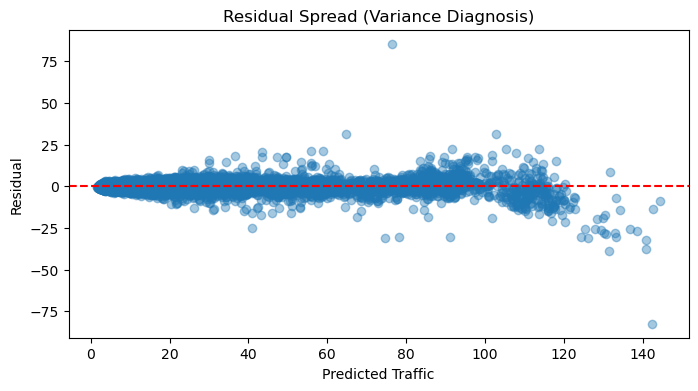

In [130]:
#Variance Diagnosis (Residual Spread)
plt.figure(figsize=(8,4))
plt.scatter(
    val_results["Predicted"],
    val_results["Residual"],
    alpha=0.4
)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Predicted Traffic")
plt.ylabel("Residual")
plt.title("Residual Spread (Variance Diagnosis)")
plt.show()

Wide scatter → high variance

Random, centered scatter → acceptable variance

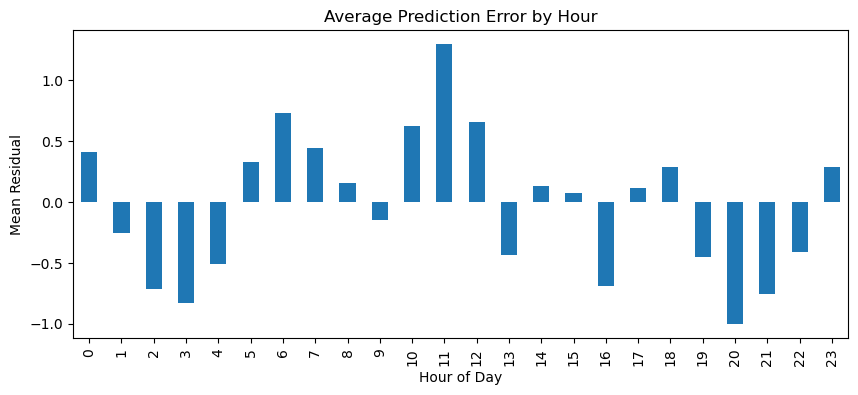

In [131]:
#Error Pattern by Hour (Systematic Errors)
hourly_error = (
    val_results
    .groupby("hour_of_day")["Residual"]
    .mean()
)

plt.figure(figsize=(10,4))
hourly_error.plot(kind="bar")
plt.xlabel("Hour of Day")
plt.ylabel("Mean Residual")
plt.title("Average Prediction Error by Hour")
plt.show()

**MODEL IMPROVEMENT**

In [132]:
#24-hour lag (previous day same hour)
traffic_weather_events["lag_24_hour"] = (
    traffic_weather_events
    .groupby("Junction")["Vehicles"]
    .shift(24)
)

In [133]:
#6-hour rolling average
traffic_weather_events["rolling_6_hour_avg"] = (
    traffic_weather_events
    .groupby("Junction")["Vehicles"]
    .transform(lambda x: x.rolling(6, min_periods=1).mean())
)

In [134]:
#Update Feature Set
refined_features = [
    "hour_of_day", "day_of_week", "month",
    "is_weekend", "event_flag",
    "temperature", "humidity", "precipitation", "wind_speed",
    "lag_1_hour", "lag_24_hour",
    "rolling_3_hour_avg", "rolling_6_hour_avg"
]

In [135]:
#Re-split Data (Time-based)
X_refined = traffic_weather_events[refined_features]
y_refined = traffic_weather_events["Vehicles"]

X_refined_train = X_refined.iloc[:split_index]
X_refined_val   = X_refined.iloc[split_index:]

y_refined_train = y_refined.iloc[:split_index]
y_refined_val   = y_refined.iloc[split_index:]

In [136]:
#Re-impute Missing Values
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

X_refined_train = pd.DataFrame(
    imputer.fit_transform(X_refined_train),
    columns=refined_features
)

X_refined_val = pd.DataFrame(
    imputer.transform(X_refined_val),
    columns=refined_features
)

In [138]:
#Train Improved Model (Histogram Gradient Boosting)
from sklearn.ensemble import HistGradientBoostingRegressor

hgb_refined = HistGradientBoostingRegressor(
    max_depth=8,
    learning_rate=0.05,
    max_iter=300,
    random_state=42
)

hgb_refined.fit(X_refined_train, y_refined_train)

hgb_predictions_refined = hgb_refined.predict(X_refined_val)

In [139]:
#Evaluate Refined Model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

refined_mae = mean_absolute_error(y_refined_val, hgb_predictions_refined)
refined_rmse = np.sqrt(mean_squared_error(y_refined_val, hgb_predictions_refined))
refined_r2 = r2_score(y_refined_val, hgb_predictions_refined)

refined_mae, refined_rmse, refined_r2

(2.0538614839380074, 3.3504917582030824, 0.9848543067347217)

**Compare Before vs After Refinement**

In [140]:
comparison = pd.DataFrame({
    "Model": ["Original Gradient Boosting", "Refined Gradient Boosting"],
    "MAE": [gbr_mae, refined_mae],
    "RMSE": [gbr_rmse, refined_rmse],
    "R2": [gbr_r2, refined_r2]
})

comparison

,Model,MAE,RMSE,R2
0,Original Gradient Boosting,2.048702,3.489380,0.983573
1,Refined Gradient Boosting,2.053861,3.350492,0.984854


# Iterative Improvement & Final Model Selection

**Iterative Improvement & Final Model Selection**

In [141]:
#Create Final Comparison Table
final_comparison = pd.DataFrame({
    "Model": [
        "ARIMA",
        "Gradient Boosting",
        "Refined Gradient Boosting"
    ],
    "MAE": [
        arima_mae,
        gbr_mae,
        refined_mae
    ],
    "RMSE": [
        arima_rmse,
        gbr_rmse,
        refined_rmse
    ],
    "R2": [
        arima_r2,
        gbr_r2,
        refined_r2
    ]
})

final_comparison

,Model,MAE,RMSE,R2
0,ARIMA,25.140896,29.040886,-0.137868
1,Gradient Boosting,2.048702,3.489380,0.983573
2,Refined Gradient Boosting,2.053861,3.350492,0.984854


Lower MAE / RMSE → better accuracy

Higher R² → explains more traffic variability

In [142]:
#Stability & Robustness Check (From CV)
cv_summary = cv_results.describe()
cv_summary

,Fold,MAE,RMSE,R2
count,5.000000,5.000000,5.000000,5.000000
mean,3.000000,1.897632,3.316940,0.961409
std,1.581139,0.070188,0.291516,0.020241
min,1.000000,1.822719,2.941099,0.938181
25%,2.000000,1.870320,3.111107,0.942119
50%,3.000000,1.882545,3.383749,0.966486
75%,4.000000,1.900435,3.476143,0.979626
max,5.000000,2.012140,3.672600,0.980632


In [144]:
final_model = hgb_refined
final_model

HistGradientBoostingRegressor(learning_rate=0.05, max_depth=8, max_iter=300,
                              random_state=42)

In [145]:
#Simulate Real-World Prediction
# Example: predict traffic for next validation hour
next_hour_prediction = final_model.predict(
    X_refined_val.iloc[[0]]
)

next_hour_prediction

array([33.9940122])